# Autoencoders

#### Question: We want to feed in $x_i$ to network and get output $x̂_i$ such that $x_i$ ≃ $x̂_i$. Is it possible ? 


Yes. Just make all the activation as linear
- i.e. whatever gets in gets out
- and train the n/w to find weights and biases


Now, let's introduce a little complexity to our network as below


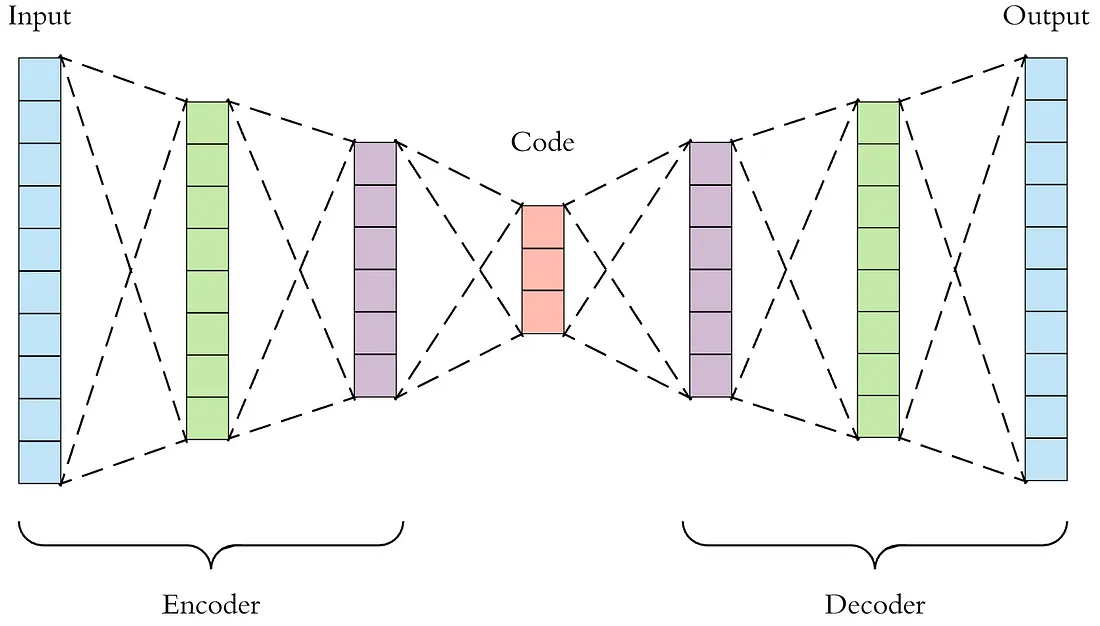
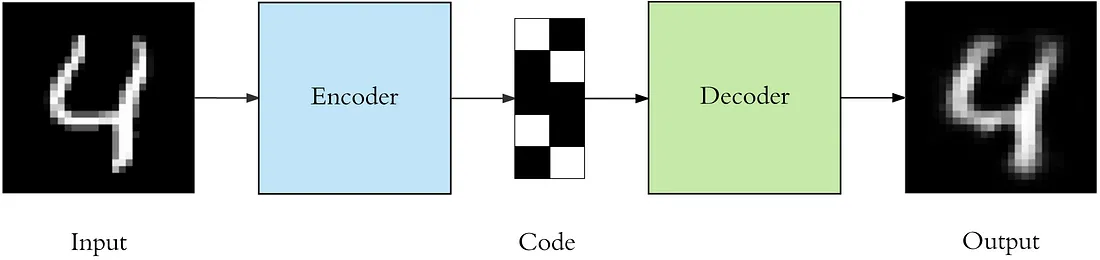


#### Question: For this network, can we make $x_i$ = 

*   List item
*   List item

$x̂_i$ ? 


The task is possible. We can make a prediction s.t. $x_i$ ∼ $x̂_i$
- but it can't be perfectly same

We can decide some loss based on the problem
- if the values are binary, we can use binary cross entropy
- for multiclass, we can use categorical cross entropy
- for continuous values, we can use MSE or RMSE.



#### What exactly happened in this network ? 

Out input was 10 dimension
- it went to 8 dimension
- and then 6 -> 3 -> 6 > 8 > 10 .

---
---

- Autoencoders are a type of neural network that are commonly used for unsupervised learning tasks, such as dimensionality reduction, data compression, and feature extraction.



- The basic idea behind an autoencoder is to learn a compressed representation of the input data in a lower-dimensional space, which is then used to reconstruct the original data with as much accuracy as possible.



- In other words, the autoencoder is trained to encode the input data into a compact representation (encoder) and then decode it back into its original form (decoder).

- The autoencoder consists of two main parts: an encoder and a decoder.




- The encoder takes the input data and compresses it into a lower-dimensional representation, while the decoder takes this compressed representation and reconstructs the original data. 


- The encoder and decoder are usually implemented as neural networks with several layers.



- During training, the autoencoder is trained to minimize the difference between the input data and the reconstructed output data.
- This is typically done by minimizing a loss function, such as the mean squared error between the input and output data.



- Once the autoencoder is trained, the encoder can be used to extract useful features from the input data.

- These features can then be used for various downstream tasks, such as classification or clustering.



- Overall, autoencoders are a powerful tool for unsupervised learning, and have been applied successfully in a wide range of applications, including image and speech recognition, anomaly detection, and natural language processing.

https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
https://medium.com/@birla.deepak26/autoencoders-76bb49ae6a8f

- A. Autoencoders are a type of neural network that are used for learning a compressed or reduced representation of input data. They are considered an unsupervised learning technique because they do not require labeled training data in order to learn the representation.

- B. The purpose of the encoding process in an autoencoder is to compress or reduce the input data into a lower-dimensional representation. This encoding is typically not the same as the input data, as it is a compressed or reduced version of the input. The encoding is then used to reconstruct the original input data through a process called decoding.

#### summary
- the left part of network is trying to compress the information i.e. **encoder**
- the right part of netowork is decompressing it i.e. **decoder**

And this had to happen so meaningfully s.t.
- all the info would be stored at middle layer.


This means we can use middle layer (bottleneck layer) as an **embedding/encoding or latent features**
- i.e. we can use this bottleneck as features.

And this network is known as **Autoencoder**

## Applications of Autoencoders  : 

**1. Dimensionality Reduction/ Compression**

Here, compression doesn't mean reducing the space 
- but to reduce the number of features of input vectors

Reducing the dimensions means
- faster inference time
- low latency 


We can also use these embeddings for visualization

**2. Denoising**

We can use AE (Autoencoders) to denoise the data

**3. Embeddings**

We can use AE to generate embeddings
- These embeddings can be used for 
    - recommender system
    - clustering
    - image search


#### Code walkthrough - Dimensionality-Reduction (using AE)

# Mnist Dataset Example :

In [101]:
import keras

In [56]:
from keras import layers
from keras.datasets import mnist


In [57]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

### Normalization : 


In [58]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255



In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
X_test.shape

(10000, 28, 28)

In [61]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [62]:
np.unique(y_train)

<IPython.core.display.Javascript object>

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### reshaping Images to 1D vectors:

In [63]:
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

### Buiding AutoEncoder : 

In [67]:
Input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128,activation='relu')(Input_img)
encoded = layers.Dense(64,activation='relu')(encoded)
encoded = layers.Dense(32,activation='relu')(encoded)

Decoded = layers.Dense(64,activation='relu')(encoded)
Decoded = layers.Dense(128,activation='relu')(Decoded)
Decoded = layers.Dense(784,activation='sigmoid')(Decoded)

In [68]:
AutoEncoder = keras.Model(Input_img,Decoded)

AutoEncoder.compile(optimizer="adam",
                   loss = "binary_crossentropy")

In [70]:
AutoEncoder.fit(X_train,X_train,                  ###
               batch_size=256,
                epochs=100,
               shuffle=True,
               validation_data=(X_test,X_test))

Epoch 1/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1506 - val_loss: 0.1393
Epoch 2/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1356 - val_loss: 0.1297
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1269 - val_loss: 0.1212
Epoch 4/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1203 - val_loss: 0.1172
Epoch 5/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1154 - val_loss: 0.1121
Epoch 6/100
235/235 [==============================] - 6s 24ms/step - loss: 0.1113 - val_loss: 0.1084
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1082 - val_loss: 0.1059
Epoch 8/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1061 - val_loss: 0.1036
Epoch 9/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1044 - val_loss: 0.1026
Epoch 10/100
235/235 [==============================] - 6s 27ms/step - loss: 0.102

235/235 [==============================] - 4s 19ms/step - loss: 0.0842 - val_loss: 0.0840
Epoch 81/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0841 - val_loss: 0.0837
Epoch 82/100
235/235 [==============================] - 6s 23ms/step - loss: 0.0841 - val_loss: 0.0838
Epoch 83/100
235/235 [==============================] - 7s 28ms/step - loss: 0.0841 - val_loss: 0.0842
Epoch 84/100
235/235 [==============================] - 5s 23ms/step - loss: 0.0840 - val_loss: 0.0838
Epoch 85/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0840 - val_loss: 0.0838
Epoch 86/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0839 - val_loss: 0.0837
Epoch 87/100
235/235 [==============================] - 5s 19ms/step - loss: 0.0839 - val_loss: 0.0835
Epoch 88/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0839 - val_loss: 0.0835
Epoch 89/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0839 - 

In [71]:
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136

313/313 [==============================] - 1s 2ms/step


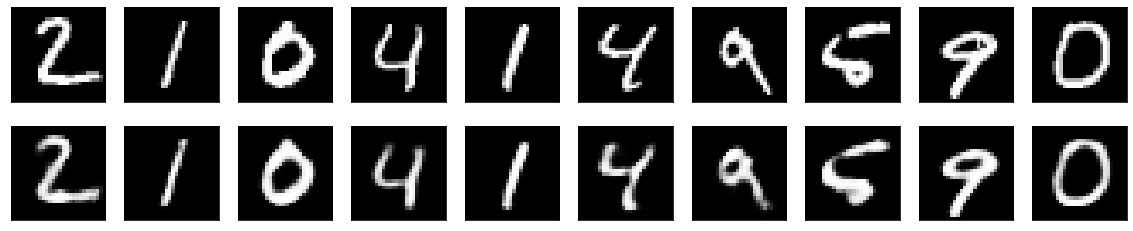

In [83]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = AutoEncoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [84]:
#AutoEncoder model for 2D encoding

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(4, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(4, activation='relu')(encoded)
decoded = layers.Dense(8, activation='relu')(decoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [88]:
model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [89]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 4)                 36  

In [90]:
model.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
235/235 [==============================] - 8s 25ms/step - loss: 0.3102 - val_loss: 0.2546
Epoch 2/100
235/235 [==============================] - 3s 15ms/step - loss: 0.2501 - val_loss: 0.2460
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2397 - val_loss: 0.2342
Epoch 4/100
235/235 [==============================] - 7s 28ms/step - loss: 0.2324 - val_loss: 0.2291
Epoch 5/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2280 - val_loss: 0.2263
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.2253 - val_loss: 0.2234
Epoch 7/100
235/235 [==============================] - 7s 28ms/step - loss: 0.2234 - val_loss: 0.2219
Epoch 8/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2204 - val_loss: 0.2189
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2177 - val_loss: 0.2166
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.216

235/235 [==============================] - 4s 15ms/step - loss: 0.1741 - val_loss: 0.1742
Epoch 81/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1739 - val_loss: 0.1745
Epoch 82/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1738 - val_loss: 0.1747
Epoch 83/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1752 - val_loss: 0.1744
Epoch 84/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1745 - val_loss: 0.1740
Epoch 85/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1747 - val_loss: 0.1734
Epoch 86/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1730 - val_loss: 0.1733
Epoch 87/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1727 - val_loss: 0.1725
Epoch 88/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1731 - val_loss: 0.1731
Epoch 89/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1725 - 

313/313 [==============================] - 1s 2ms/step


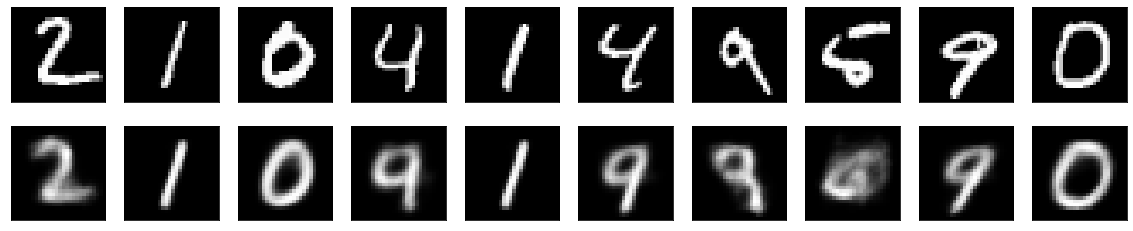

In [92]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = model.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [93]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 4)                 36  

In [ ]:
# We need the output of 8th layer

In [94]:
model.layers

In [95]:
model.layers[7].output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_18')>

In [96]:
dim_2_model = keras.Model(model.input, model.layers[7].output)

In [97]:
dim_2_model

## comparing results with t-SNE

In [105]:
from openTSNE import TSNE

In [106]:
indices = np.random.choice(X_test.shape[0], 1000, replace = False)

<IPython.core.display.Javascript object>

In [108]:
sample = X_test[indices]
sample_y = y_test[indices]

In [114]:
# import time
# tSNE
# %%time

Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(sample)

### TSNE visualization of MNIST

In [115]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.husl_palette(len(np.unique(sample_y))))

<IPython.core.display.Javascript object>

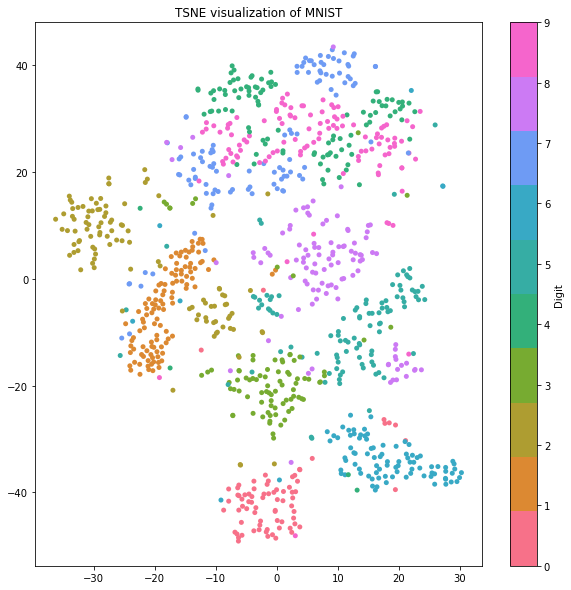

In [116]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('TSNE visualization of MNIST')
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

### AE visualization of MNIST

In [118]:
dim_2d = dim_2_model.predict(sample)
dim_2d.shape

32/32 [==============================] - 0s 2ms/step


(1000, 2)

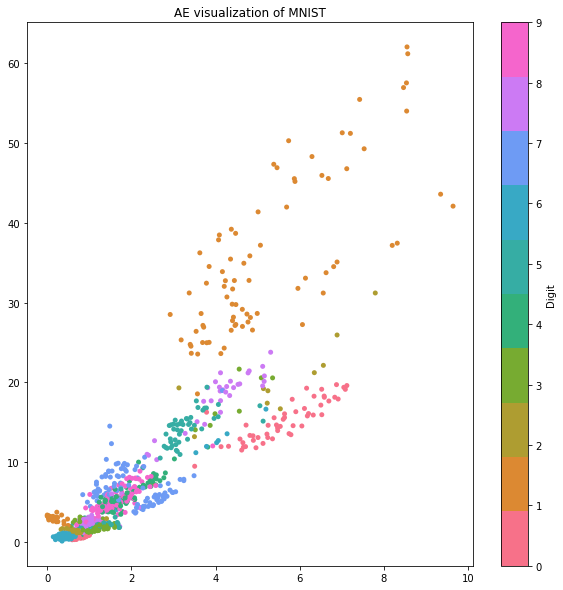

In [119]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('AE visualization of MNIST')

im = ax.scatter(dim_2d[:,0], dim_2d[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

# Feature Extraction and Transfer learning

        
        
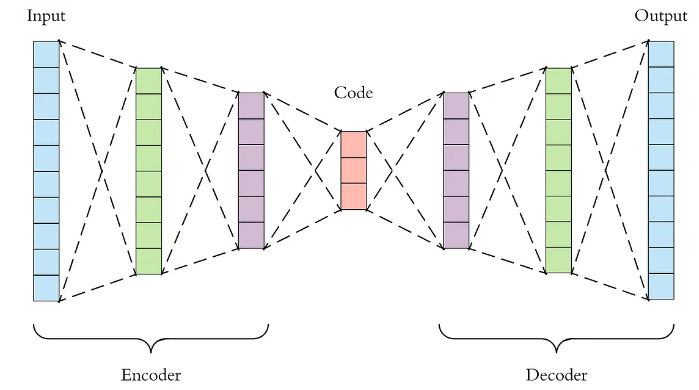
        


The idea of feature extraction is
- although there can be some information loss
- we know that emebeddings has the the information

So, we can use them as features

Once we have these embeddings,
- we can go back to ML/DL 
- and perform any task (say classification)
- with embeddings as our features.


For example:

- Say, we have image data and we want to classification

#### Question: Are DT and log. regression good enough to classify image data ?

No.

#### What can we do instead ? 

- **We can run an autoencoder to get the embeddings**
    - and use them to run KNN, Log. reg. or Tree based model.




- **For recommender system**
    - we can get the embeddings 
    - and run cosine similiarity on it 
    - or cluster the embeddings.

# Transfer Learning

Consider the following complex network with millions of parameters

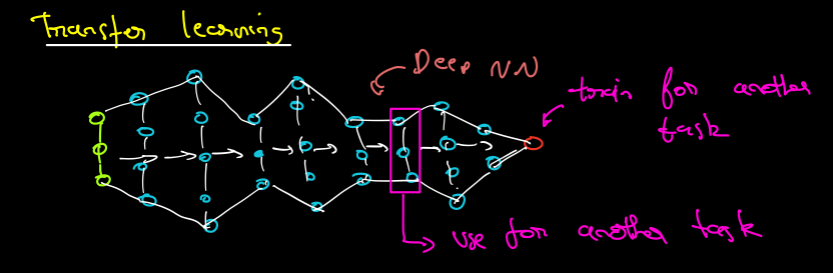

Suppose it is is a binary classification model
- i.e. output layer has single neuron with sigmoid as activation function

Now, the network was trained to detect 
- whether a person has cancer on not based on the images provided.

Say, our usecase is to detect whether a person has covid or not

#### What choices do we have ?

**Solution 1: Build a model from scratch and train it.**
- But we may not get the same result as researchers who ran their deep NN model on GPU for weeks/months to get the weights

**Solution 2: Use pre-trained model to get embeddings**
- We can use a pre trained model (cancer model) 
    - to generate embeddings
    - and then use those embeddings as input 
    - to run DL/ML model for our task (covid prediction)

It was orginally created for other task but we use the output of intermediate layer for another task. 

This is called as **Transfer Learning**
    

# Denoising Auto Encoders

Sometimes some encoders
- can have more number of neuron compared to input
- i.e. it's stepping up instead of stepping down


Sometimes auto encoders can overfit
- and learn something called **identity function**
- i.e. output = input 

To deal with this,
- we add some random noise the the input 

#### What happens when we add random noise to it ?

Now, as we have added random noise to our input
- we know if network fully recreates the input
- it means network has overfitted.


And the network should not be recreate the noise 
- as there is no pattern to it

Think of it as regularization over the network
- as network can't recreate the noise
- it ends up recreating the original data

**The network cleans the data of any noise**

In [122]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



#### adding  NOISE


In [123]:

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


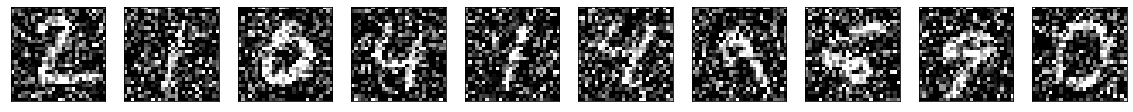

In [124]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [125]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Compile and Fit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, # NOTE: input is noisy, output is non-noisy
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 [==============================] - 6s 19ms/step - loss: 0.2652 - val_loss: 0.2049
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1842 - val_loss: 0.1711
Epoch 3/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1652 - val_loss: 0.1584
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1557 - val_loss: 0.1511
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1498 - val_loss: 0.1464
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1455 - val_loss: 0.1437
Epoch 7/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1420 - val_loss: 0.1396
Epoch 8/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1390 - val_loss: 0.1370
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1364 - val_loss: 0.1343
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.134

235/235 [==============================] - 4s 17ms/step - loss: 0.1111 - val_loss: 0.1137
Epoch 81/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1111 - val_loss: 0.1139
Epoch 82/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1110 - val_loss: 0.1142
Epoch 83/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1111 - val_loss: 0.1136
Epoch 84/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1109 - val_loss: 0.1142
Epoch 85/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1109 - val_loss: 0.1135
Epoch 86/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1108 - val_loss: 0.1132
Epoch 87/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1107 - val_loss: 0.1133
Epoch 88/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1107 - val_loss: 0.1135
Epoch 89/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1105 - 

313/313 [==============================] - 1s 3ms/step


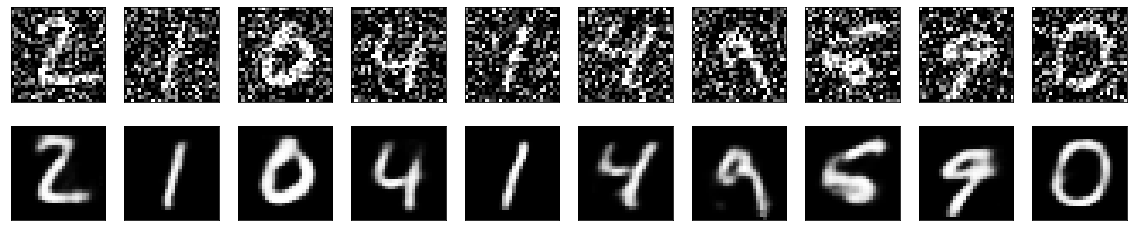

In [126]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Recommender System using AE

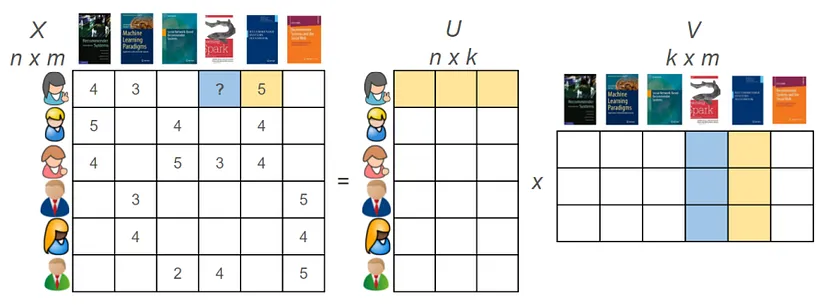



 user-item iteraction matrix
- where each row represents the user
- columns represents the movie ratings by user

Do note that this iteraction matrix is sparse


Now, we can use these item vectors (movie ratings)
- as a input to our AE
- learn a dense embeddings
- and use these embeddings to find similar movies.

In [128]:
# !gdown 1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
# !gdown 1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD

In [129]:
ratings = pd.read_csv('ratings.csv')
ratings.shape

<IPython.core.display.Javascript object>

(105339, 4)

In [130]:
ratings.movieId.unique().shape

(10325,)

In [131]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [132]:
rm = ratings.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,...,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.5,4.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.5,4.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,3.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [133]:
rm.shape

(10325, 668)

In [134]:
# Check the sparsity of data
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

0.015272940801206305

In [135]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(rm, test_size = 0.2)
X_train = train.values
X_val = val.values
X_train.shape,X_val.shape


((8260, 668), (2065, 668))

In [136]:
import keras
from keras import layers

input_movie = keras.Input(shape=(668,))
encoded = layers.Dense(512, activation='relu')(input_movie)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)


decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(668, activation='linear')(decoded)




autoencoder = keras.Model(input_movie, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/100
33/33 [==============================] - 2s 40ms/step - loss: 0.1675 - val_loss: 0.1604
Epoch 2/100
33/33 [==============================] - 1s 38ms/step - loss: 0.1431 - val_loss: 0.1456
Epoch 3/100
33/33 [==============================] - 1s 38ms/step - loss: 0.1304 - val_loss: 0.1339
Epoch 4/100
33/33 [==============================] - 1s 36ms/step - loss: 0.1198 - val_loss: 0.1266
Epoch 5/100
33/33 [==============================] - 1s 36ms/step - loss: 0.1116 - val_loss: 0.1218
Epoch 6/100
33/33 [==============================] - 1s 38ms/step - loss: 0.1051 - val_loss: 0.1174
Epoch 7/100
33/33 [==============================] - 1s 45ms/step - loss: 0.0997 - val_loss: 0.1147
Epoch 8/100
33/33 [==============================] - 1s 42ms/step - loss: 0.0948 - val_loss: 0.1122
Epoch 9/100
33/33 [==============================] - 1s 40ms/step - loss: 0.0905 - val_loss: 0.1098
Epoch 10/100
33/33 [==============================] - 1s 38ms/step - loss: 0.0866 - val_loss: 0.1077

33/33 [==============================] - 1s 37ms/step - loss: 0.0324 - val_loss: 0.0995
Epoch 83/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0322 - val_loss: 0.1000
Epoch 84/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0318 - val_loss: 0.1000
Epoch 85/100
33/33 [==============================] - 1s 36ms/step - loss: 0.0316 - val_loss: 0.0999
Epoch 86/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0312 - val_loss: 0.1002
Epoch 87/100
33/33 [==============================] - 1s 36ms/step - loss: 0.0316 - val_loss: 0.1009
Epoch 88/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0323 - val_loss: 0.1005
Epoch 89/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0317 - val_loss: 0.1010
Epoch 90/100
33/33 [==============================] - 1s 36ms/step - loss: 0.0329 - val_loss: 0.1011
Epoch 91/100
33/33 [==============================] - 1s 35ms/step - loss: 0.0328 - val_loss: 0.1010
Epo

In [137]:
# Extracting embeddings

In [138]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 668)]             0         
                                                                 
 dense_32 (Dense)            (None, 512)               342528    
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 256)               33024     
                                                                 
 dense_36 (Dense)            (None, 512)               131584    
                                                                 
 dense_37 (Dense)            (None, 668)               3426

In [139]:
autoencoder.layers[3].output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_34')>

Layer number 4 returns the latent space emebddings.

Let's create a model with 
- input as model input and 
- output as layer 4 output

In [140]:
intermediate_model = keras.Model(autoencoder.input, autoencoder.layers[3].output)


In [141]:
# Predicting embeddings for all movies

In [142]:
embeddings = intermediate_model.predict(rm.values)
embeddings

323/323 [==============================] - 2s 4ms/step


array([[ 0.        ,  0.        , 15.077666  , ..., 11.71739   ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.285629  , ...,  7.9302816 ,
         4.5572524 ,  0.        ],
       [ 0.        ,  1.2031718 ,  1.622383  , ...,  7.9816327 ,
         3.2830877 ,  0.        ],
       ...,
       [ 0.        ,  0.01771135,  0.24046561, ...,  0.18932694,
         0.20047438,  0.        ],
       [ 0.        ,  0.38652048,  0.35424098, ...,  0.69848675,
         1.0548656 ,  0.        ],
       [ 0.        ,  0.03033022,  0.28931072, ...,  0.2342573 ,
         0.207658  ,  0.        ]], dtype=float32)

In [143]:
embeddings.shape

(10325, 128)

In [144]:
embeddings[10]

array([ 0.        ,  0.        , 10.671131  , 10.851497  ,  0.        ,
        0.        ,  0.        ,  2.7042146 ,  0.        ,  4.331475  ,
        6.3167415 ,  6.349419  ,  0.        ,  0.67705303,  0.        ,
        0.        ,  0.        ,  0.7581348 ,  2.214355  ,  0.        ,
        1.40102   ,  0.        ,  0.        ,  0.7453684 ,  1.5518111 ,
        0.        ,  0.        ,  2.5998707 ,  4.7457643 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       13.286313  ,  0.        ,  6.4613233 , 11.331225  ,  0.        ,
        1.1412003 ,  0.        ,  0.        , 10.484521  ,  0.        ,
        2.6798851 ,  8.971754  ,  6.300122  , 15.00614   ,  1.9848937 ,
        0.        ,  2.6790094 ,  4.605583  ,  0.        ,  0.        ,
        1.2334563 ,  2.4876158 ,  2.954207  ,  0.        ,  0.        ,
        0.        ,  0.        ,  6.860196  ,  0.        ,  0.        ,
        8.356741  , 11.510284  , 13.920773  , 10.5517435 ,  0.  

In [145]:
# Finding similar movies - Cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embeddings)
similarity_matrix.shape

(10325, 10325)

In [146]:
similarity_matrix

array([[1.        , 0.6996162 , 0.6533174 , ..., 0.54064053, 0.5515271 ,
        0.5258664 ],
       [0.6996162 , 1.0000001 , 0.7586583 , ..., 0.7082663 , 0.701148  ,
        0.69979393],
       [0.6533174 , 0.7586583 , 0.9999999 , ..., 0.61311996, 0.67478937,
        0.6072622 ],
       ...,
       [0.54064053, 0.7082663 , 0.61311996, ..., 0.9999999 , 0.7520974 ,
        0.9989575 ],
       [0.5515271 , 0.701148  , 0.67478937, ..., 0.7520974 , 1.        ,
        0.7375216 ],
       [0.5258664 , 0.69979393, 0.6072622 , ..., 0.9989575 , 0.7375216 ,
        0.9999999 ]], dtype=float32)

In [147]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head() #Item-similarity Matrix

<IPython.core.display.Javascript object>

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,59,60,61,62,63,64,...,136447,136562,136564,136598,136654,136800,136890,138036,138104,138206,138702,138863,138914,138952,139385,139415,139620,139642,139644,139747,139920,140098,140110,140247,140265,140711,140715,140725,140737,140777,140816,140820,141305,141432,141472,141688,142074,142448,142488,142507,142536,142550,142562,142566,142973,143031,143257,143385,143709,143882,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.699616,0.653317,0.596570,0.688527,0.631635,0.661547,0.688585,0.607985,0.639373,0.560811,0.597838,0.554515,0.656852,0.559690,0.617326,0.638938,0.604958,0.577386,0.577416,0.596461,0.556600,0.583531,0.589834,0.666014,0.603773,0.569216,0.574947,0.588468,0.521381,0.546057,0.679120,0.617215,0.679491,0.534256,0.611779,0.685315,0.507547,0.580062,0.588932,0.570344,0.663749,0.610147,0.516085,0.698976,0.657400,0.497842,0.685121,0.679253,0.573055,0.639058,0.519364,0.526786,0.644129,0.634470,0.669032,0.574920,0.623410,0.588457,0.610447,...,0.555821,0.550705,0.541551,0.552276,0.602518,0.602460,0.536269,0.514900,0.525866,0.612079,0.633365,0.580600,0.565312,0.660292,0.488950,0.540641,0.536312,0.630526,0.543271,0.465503,0.588727,0.565312,0.638849,0.544673,0.552276,0.519104,0.479500,0.565679,0.612477,0.540641,0.565312,0.463856,0.559099,0.540641,0.565312,0.612079,0.558526,0.597025,0.536269,0.543924,0.574664,0.532422,0.532422,0.525866,0.525866,0.517654,0.468448,0.498446,0.532422,0.689326,0.558526,0.532422,0.583936,0.565251,0.541478,0.494749,0.511368,0.540641,0.551527,0.525866
2,0.699616,1.000000,0.758658,0.769563,0.650956,0.665719,0.695862,0.757400,0.677054,0.779430,0.645009,0.704149,0.702065,0.608910,0.734130,0.742050,0.645551,0.669164,0.787341,0.749181,0.725102,0.696380,0.706143,0.715081,0.629961,0.685661,0.733057,0.689213,0.601865,0.613775,0.719187,0.624299,0.668883,0.688687,0.706603,0.612417,0.784113,0.634154,0.699254,0.662429,0.680546,0.830818,0.662315,0.668159,0.701616,0.773127,0.687310,0.600311,0.694965,0.704156,0.717571,0.634277,0.755161,0.599814,0.720991,0.748729,0.651829,0.563318,0.671140,0.680485,...,0.697094,0.736048,0.694719,0.695145,0.717666,0.686013,0.680942,0.625858,0.699794,0.698574,0.689665,0.704171,0.696083,0.698633,0.670489,0.708266,0.624621,0.707844,0.662166,0.655411,0.730499,0.696083,0.693097,0.733444,0.695145,0.689009,0.663981,0.702438,0.718423,0.708266,0.696083,0.617091,0.606862,0.708266,0.696083,0.698574,0.739689,0.702693,0.680942,0.684805,0.706516,0.703497,0.703497,0.699794,0.699794,0.596295,0.657467,0.677976,0.703497,0.742419,0.739689,0.703497,0.707831,0.719863,0.752708,0.674623,0.686379,0.708266,0.701148,0.699794
3,0.653317,0.758658,1.000000,0.784223,0.848720,0.646369,0.785734,0.768150,0.782888,0.611005,0.647397,0.774226,0.691359,0.736960,0.721954,0.654094,0.650294,0.763325,0.680162,0.704419,0.592791,0.731660,0.717601,0.721742,0.754417,0.773491,0.749757,0.675966,0.642160,0.710492,0.679383,0.585084,0.720615,0.579332,0.679989,0.740056,0.700092,0.691132,0.727180,0.676039,0.770948,0.707995,0.673223,0.722731,0.554921,0.721790,0.620464,0.480160,0.792657,0.642831,0.708882,0.721402,0.773376,0.709358,0.683598,0.775096,0.782156,0.730410,0.734920,0.839544,...,0.687193,0.632583,0.677106,0.687188,0.684257,0.668637,0.604029,0.592429,0.607262,0.686486,0.661270,0.620447,0.613731,0.653875,0.605917,0.613120,0.629395,0.688760,0.646907,0.577854,0.631792,0.613731,0.662769,0.630550,0.687188,0.613888,0.597821,0.686986,0.675346,0.613120,0.613731,0.560358,0.620063,0.613120,0.613731,0.686486,0.635592,0.651240,0.604029,0.605963,0.686968,0.609644,0.609644,0.607262,0.607262,0.574345,0.578802,0.606607,0.609644,0.693886,0.635592,0.609644,0.671582,0.622858,0.636252,0.605167,0.606310,0.613120,0.674789,0.607262
4,0.596570

In [148]:
movies = pd.read_csv('movies.csv')
movies[movies.title.str.contains('Liar Liar')]

<IPython.core.display.Javascript object>

,movieId,title,genres
1202,1485,Liar Liar (1997),Comedy


In [149]:
item_sim_matrix[1485].sort_values(ascending=False).head(10)

movieId
1485    1.000000
1407    0.868493
1777    0.850560
1391    0.844792
3052    0.841587
1380    0.837761
1614    0.837554
1722    0.836033
2054    0.835053
1641    0.831874
Name: 1485, dtype: float32

In [150]:
movie_index = item_sim_matrix[1485].sort_values(ascending=False).head(10).index

In [151]:
movies[movies.movieId.isin(movie_index)]

,movieId,title,genres
1121,1380,Grease (1978),Comedy|Musical|Romance
1130,1391,Mars Attacks! (1996),Action|Comedy|Sci-Fi
1143,1407,Scream (1996),Comedy|Horror|Mystery|Thriller
1202,1485,Liar Liar (1997),Comedy
1292,1614,In & Out (1997),Comedy
1310,1641,"Full Monty, The (1997)",Comedy|Drama
1368,1722,Tomorrow Never Dies (1997),Action|Adventure|Thriller
1398,1777,"Wedding Singer, The (1998)",Comedy|Romance
1614,2054,"Honey, I Shrunk the Kids (1989)",Adventure|Children|Comedy|Fantasy|Sci-Fi
2441,3052,Dogma (1999),Adventure|Comedy|Fantasy


---

**Batch normalization : In reference to Batch Normalization in deep neural networks :**

- With batch normalization the neural network becomes less sensitive to initial setting of weights before beginning the training process.

- Batch normalization allows faster training by use of large learning rates.